# NAT Baseline

In [49]:
!activate sak
!pip install sklearn pints numpy pandas sklearn

from __future__ import print_function
import warnings
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

%matplotlib inline


(sak) c:\Users\sakib\OneDrive - University of Edinburgh\Year 4\Natural Computing\NAT-CW2>conda.bat activate sak 


In [50]:
# generate the twospirals data

def twospirals(n_points, noise=.0, square=False, sine=False):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt( np.random.rand(n_points,1) ) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise

    d1 = (d1x, d1y)
    negd1 = (-d1x, -d1y)

    if sine: 
        sinx1, sinx2 = np.sin(d1x), np.sin(d1y)
        d1 += (sinx1, sinx2)
        negd1 += (-sinx1, -sinx2)

    if square:
        sqx1, sqx2 = d1x*d1x, d1y*d1y
        d1 += (sqx1, sqx2)
        negd1 += (-sqx1, -sqx2)

    x1 = np.hstack(d1)
    x2 = np.hstack(negd1)

    x = np.vstack( (x1, x2) )
    y = np.hstack( ( np.zeros(n_points), np.ones(n_points) ) )
    return (x, y)
    # (np.vstack( ( np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)) ) ), np.hstack((np.zeros(n_points),np.ones(n_points))))

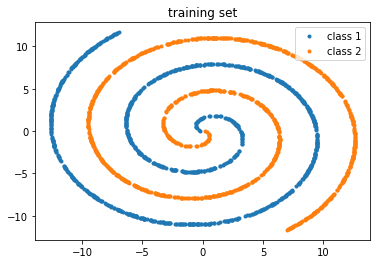

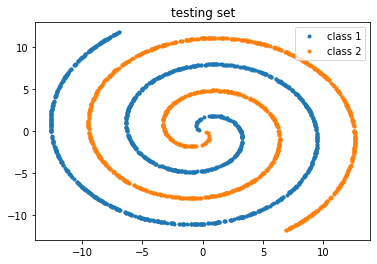

In [51]:
X_train, y_train = twospirals(n_points=1000, noise=.0, square=True, sine=True)
X_test, y_test = twospirals(n_points=1000, noise=.0, square=True, sine=True)

plt.title('training set')
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], '.', label='class 1')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], '.', label='class 2')
plt.legend()
plt.show()

plt.title('testing set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.', label='class 1')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.', label='class 2')
plt.legend()
plt.show()

In [62]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (4,), (5,), (6,), (7,), (8,) #,(9,),(10,),(11,),(12,),(13,),(14,),(15,)
             ]
        }
       ]

# won't converge because of CI's time constraints, so we catch the warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=ConvergenceWarning, module='sklearn')
    mlp = GridSearchCV(MLPClassifier(), param_grid, cv=3, scoring='accuracy', verbose=0)
    mlp.fit(X_train, y_train)
    print(f'Best parameters set found on development set: {mlp.best_params_}')

# (X,Y)                             best params {'activation': 'tanh', 'hidden_layer_sizes': (8,), 'solver': 'adam'}
# (X,Y, sin(X), sin(Y), X*X, Y*Y)   best params {'activation': 'identity', 'hidden_layer_sizes': (4,), 'solver': 'lbfgs'}
best_param_mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(8,), solver='lbfgs')
best_param_mlp.fit(X_train, y_train)
print(f'Training set acc: {best_param_mlp.score(X_train, y_train)}')
print(f'Testing set acc: {best_param_mlp.score(X_test, y_test)}')
print(f'Mean Squared err: {mean_squared_error(y_test, best_param_mlp.predict(X_test))}')

Best parameters set found on development set: {'activation': 'identity', 'hidden_layer_sizes': (4,), 'solver': 'lbfgs'}
Training set acc: 1.0
Testing set acc: 1.0
Mean Squared err: 0.0


In [63]:
# main tests
layers = [(4,2), (5,2), (6,2), (7,2), (8,2)]
X_train, y_train = twospirals(n_points=1000, noise=.0, square=True, sine=True)
X_test, y_test = twospirals(n_points=1000, noise=.0, square=True, sine=True)

for l in layers:
    mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=l, solver='lbfgs', max_iter=2)
    mlp.fit(X_train, y_train)
    print(f'neurons: {l[0]} \t\ttrain acc: {mlp.score(X_train, y_train)} \t\ttest acc: {mlp.score(X_test, y_test)} \t\tmse: {mean_squared_error(y_test, mlp.predict(X_test))}')

neurons: 4 		train acc: 0.9975 		test acc: 0.9985 		mse: 0.0015
neurons: 5 		train acc: 0.987 		test acc: 0.9855 		mse: 0.0145
neurons: 6 		train acc: 0.999 		test acc: 0.9985 		mse: 0.0015
neurons: 7 		train acc: 0.997 		test acc: 0.9975 		mse: 0.0025
neurons: 8 		train acc: 0.991 		test acc: 0.992 		mse: 0.008
